# Finding Heavy Traffic Indicators on I-94

In this project, we're going to analyze a dataset about the westbound traffic on the [I-94 Interstate Highway](https://en.wikipedia.org/wiki/Interstate_94).

The goal of this project is to determine some indicators of heavy traffic on I-94. There may be multiple indicators such as weather type, type of day, time of the week, etc. For instance, we may find out that traffic is usually heavier in the summer or when it snows.

## The I-94 Traffic Dataset
Let us start by reading the dataset and familiarize ourselves with it.

The dataset can be found and downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume), and it was created by John Hogue.

The data dictionary proceeds to describe the variables as follows:
- `holiday`: US Natoinal holidays plus regional holiay, Minnesota State Fair
- `temp`: Average temp in Kelvin
- `rain_1h`: Amount in mm of rain that occurred in the hour
- `snow_1h`: Amount in mm of snow that occurred in the hour
- `clouds_all`: Percentage of cloud cover
- `weather_main`: Short textual descruption of the current weather
- `weather_description`: Longer textual description of the current weather
- `date_time`: Hour of the data collected in tlocal CST time
- `traffic_volume`: Hourly I-94 ATR 301 reported westbound traffic volume


In [1]:
import pandas as pd

traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
traffic

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [2]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset contains 48,204 entries and 9 columns. It displays no null values within its rows. There are three datatypes found: `float64`, `int64`, and `object` types. The data presented dates from 2012-10-02 09:00:00 to 2018-09-30 23:00:00. Each row represents a specific hour, its weather and traffic volume information amongst other features.

## Analyzing Traffic Volume


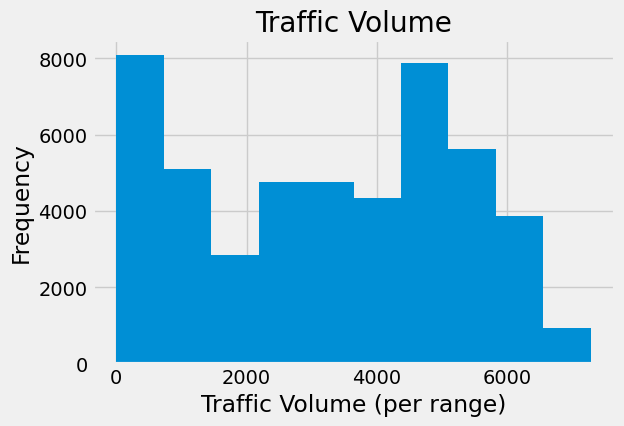

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style

style.use("fivethirtyeight")

traffic["traffic_volume"].plot.hist()
plt.title("Traffic Volume")
plt.xlabel("Traffic Volume (per range)")
plt.show()

In [4]:
traffic["traffic_volume"].describe()    

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

There is an average traffic volume of 3,259.81 cars per hour in total. However, given the histogram is right skewed, the data is not in a normal distribution, it tends to have a more uniform shape at some points with some noticeable variations: Pointing towards a non-symmeric bimodal distribution. 

The maximum value of traffic volume is about twice the average volume, 7,280 vehicles. The minimun is 0. Although, 25% of the time there are 1,193 vehicles, the 75 percentile (75% of the time) expresses that traffic increases almost 4 times in comparison to 25% of the time. What could be the reason for such a sudden increase in traffic volume? Is it the day and night cycle? Or could it be due to the weather? 

## Traffic Volume: Day vs. Night
The possibility that daytime and nightime cycles might influence our data makes us take a look into this possible cause for such variations in traffic volume. Given that about 75% of the time the traffic volume is 4,933 cars or fewer and the remaining 25% of the time exceeded 4,933 makes this hypothesis more factual. There are repairs at nightime in the I-94.

Let's divide the dataset in two parts:
- Daytime data: Hours from 7 a.m. to 7 (before 7) p.m. (12 hours)
- Nightime data: Hours from 7 p.m. to  7 (before 7) (12 hours)

The selected criterion for this exercise is set as an arbitrary starting point, knowing that this is not the best criterion to select but functional.

Starting, we need to transform the data in the `date_time` column to a `datetime` data type column.

In [5]:
traffic["date_time"] = pd.to_datetime(traffic["date_time"])
traffic["date_time"]

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: datetime64[ns]

In [6]:
day = traffic.copy()[(traffic["date_time"].dt.hour >= 7) & (traffic["date_time"].dt.hour < 19)]
day

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132


In [7]:
night = traffic.copy()[(traffic["date_time"].dt.hour >= 19 ) | (traffic["date_time"].dt.hour < 7)]
night

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


At first sight, the `traffic_volume` values from the nighttime dataset seem to be smaller in appearance in comparison to the daytime values.

## Traffic Volume: Day vs. Night (II)
Let's compare the resulting data available from the daytime and nightime isolation procedure.

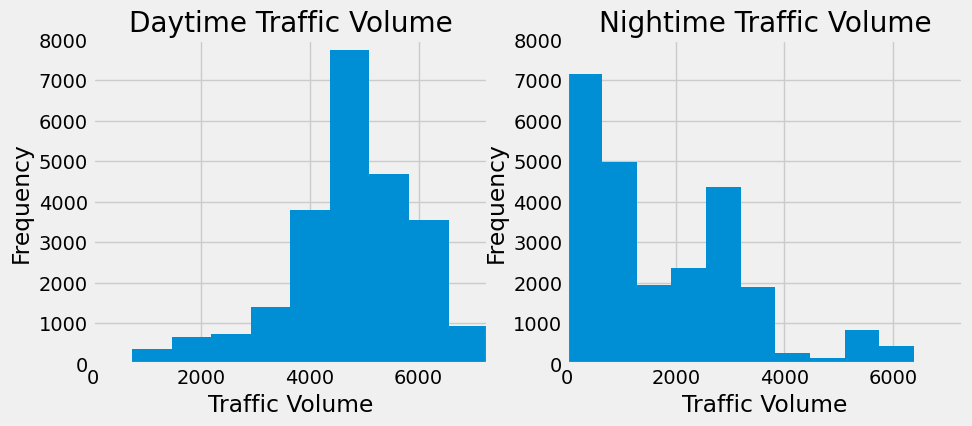

In [8]:
plt.figure(figsize = (10, 4))

# daytime data
plt.subplot(1, 2, 1)
day["traffic_volume"].plot.hist()
plt.title("Daytime Traffic Volume")
plt.xlabel("Traffic Volume")
plt.xlim([0, 7280])
plt.ylim([0, 8000])

# nightime data
plt.subplot(1, 2, 2)
night["traffic_volume"].plot.hist()
plt.title("Nightime Traffic Volume")
plt.xlabel("Traffic Volume")
plt.xlim([0, 7280])
plt.ylim([0, 8000])

plt.show()

In [9]:
day["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [10]:
night["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The daytime data histogram appears to display a normal distribution with a light tendency to be left skewed. This means that the data tends to be on higher traffic volume values. The highest traffic volume on daytime is 7,280 cars with an average of 4,762.04 cars per hour. 25% of the time the traffic volume is 4,252 cars.

In comparison to the daytime data, the nightime data is right skewed, which means that there is significant tedency towards smaller traffic volume values. The average traffic volume per hour is 1,784.37 cars per hour. Almost 3.5 times smaller than that of the daytime data. The maximum traffic volume on nightime is 6,386 cara. 25% of the time, the volume of the traffic was 530 cars.

It is reasonable to conclude that during the nights, the car traffic is smaller in comparison to daytime traffic given the presented data. To make a more critical and objective analysis, we must not stop using the nightime data, but use it as reference to find heavy traffic indicators. In other words, moving forward we will use daytime data as it contains the indicators related to the heavy traffic, nevertheless, if the need to compare data arises, we could use the nightime data as reference.

## Time Indicators
Given the explained scenario, we will use daytime data at the moment. 

Time, weather and day (holidays) are the three possible indicators of heavy traffic. There could be more people at a certain time of the day, month or day.

We could compare time variables to traffic volume through line charts to find patterns and possible heavy traffic indicators. These are some parameters to use based on the available datasets:
- Month
- Day of the week
- Time of day

Let's begin by examining the traffic volume per month.

In [11]:
day["month"] = day["date_time"].dt.month
by_month = day.groupby("month").mean()
by_month["traffic_volume"]

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

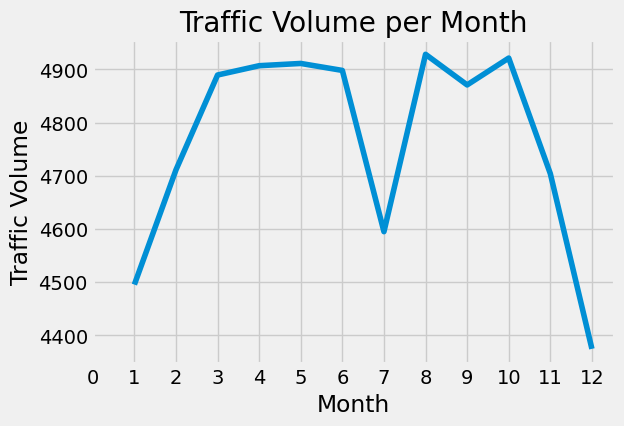

In [12]:
by_month["traffic_volume"].plot.line()
plt.title("Traffic Volume per Month")
plt.xlabel("Month")
plt.ylabel("Traffic Volume")
plt.xticks([i for i in range(0, 13)])
plt.show()

About 5 months of the year out of the 12 maintain visible lower values in comparison to the rest of the months. Starting from October to March (cold months) the traffic decreases in comparison to warm months. The only exception regarding this common tendency is the month of July. It is not a warm month, but for some reason there appears to be an exception to it. Some potential causes to it could be:
- Vacations for families with children
- Lack of schools functioning due to vacations

## Time Indicators
Let us now focus on traffic volume variations by looking at the data being displayed by day of the week.

In [13]:
day["dayofweek"] = day["date_time"].dt.dayofweek
by_dayofweek = day.groupby("dayofweek").mean()
by_dayofweek["traffic_volume"] # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

In [14]:
by_dayofweek["traffic_volume"].describe()

count       7.000000
mean     4761.958037
std       764.684759
min      3436.541789
25%      4410.400422
50%      5189.004782
75%      5288.027555
max      5311.303730
Name: traffic_volume, dtype: float64

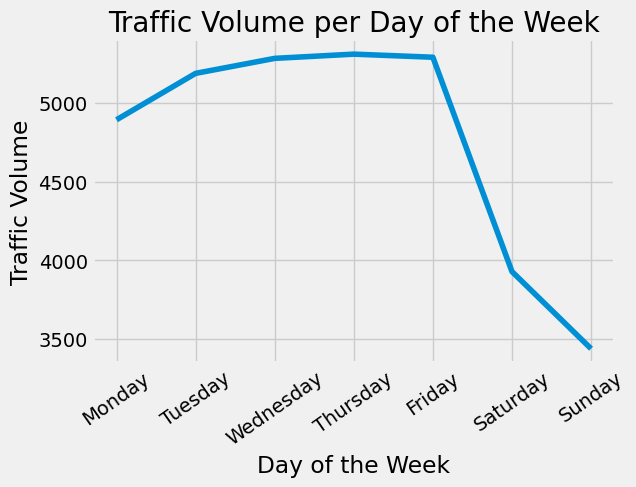

In [15]:
by_dayofweek["traffic_volume"].plot.line()
plt.title("Traffic Volume per Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Traffic Volume")
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6], 
           labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], 
           rotation = 35)
plt.show()

There are visible differences between business days and weekends. On weekends, the traffic volume decreases significantly. Its highest traffic volume was 5,311.30 while the lowest was 3,436.54 on weekends.

## Time Indicators (III)
It has been previously appointed that traffic volume is significantly heavier on business days compared to weekends.

Based on the previous analysis, we should generate a line chart for the time of the day looking for traffic indicators. It is important to notice that mathematically, if we include the traffic volume from the weekends, we could cause a data skew by calculating the average traffic per hour. The best solution to this potential issue is to separate the traffic per hour and compare the resulting data between business days and weekends.

In [16]:
day["hour"] = day["date_time"].dt.hour
business_days = day.copy()[day["dayofweek"] <= 4] # 4 == Friday
weekend = day.copy()[day["dayofweek"] > 4] # 5, 6 == Saturday, Sunday

by_hour_businessdays = business_days.groupby("hour").mean()
by_hour_businessdays["traffic_volume"]

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64

In [17]:
by_hour_weekend = weekend.groupby("hour").mean()
by_hour_weekend["traffic_volume"]

hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64

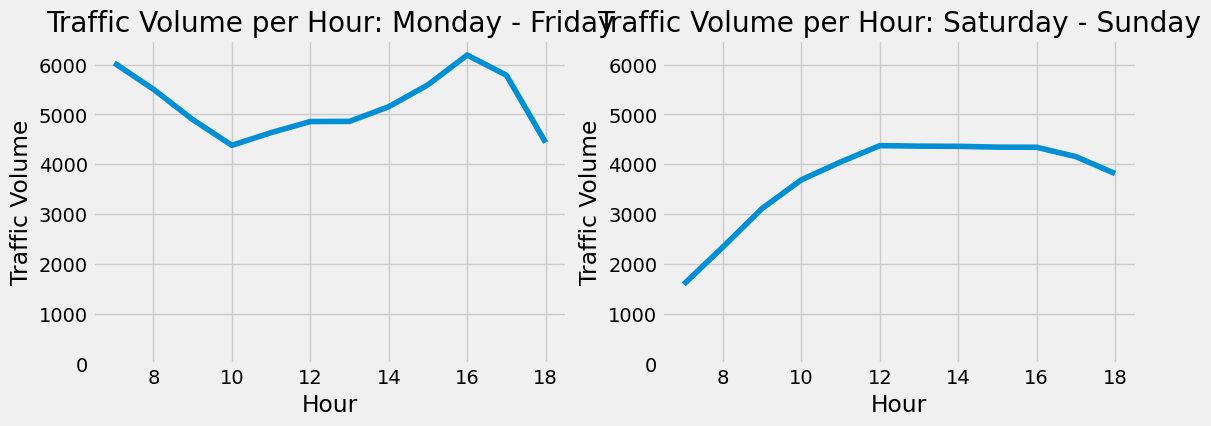

In [18]:
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
by_hour_businessdays["traffic_volume"].plot.line()
plt.title("Traffic Volume per Hour: Monday - Friday")
plt.xlabel("Hour")
plt.ylabel("Traffic Volume")
plt.ylim([0, 6500])

plt.subplot(1, 2, 2)
by_hour_weekend["traffic_volume"].plot.line()
plt.title("Traffic Volume per Hour: Saturday - Sunday")
plt.xlabel("Hour")
plt.ylabel("Traffic Volume")
plt.ylim([0, 6500])

plt.show()

On business days, the heavier traffic happens at 7 am and at 16 pm. After these two hours the traffic volume tends to decrease fast. This could be due to the average entry hours when people go to their jobs or leave their children at school. Also, given the irregularity of the curve in the chart, it shows the irregular factors (activities) on business days.

On weekends, the heavier traffic volume maintains itself for a couple of hours. It starts at 12 pm and ends at 16 pm. The curve has a logaritmic behavior. Most jobs do not require employees to attend to their jobs on weekends, therefore, it could justify the average lower traffic volume on weekends.

## Weather Indicators
Another possible indicator of heavy traffic is weather, as it has been mentioned before. Some useful columns offered by the dataset could help us analyse this potential indicator: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

Given that some of these columns are numerical, we could find if there is any kind of correlation between them and `trafic_volume`.

In [19]:
day.corr()["traffic_volume"]

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Weather does not represent any strong correlations coefficients above 0.2 as one could have imagined. It sems that it might not be a good indicator. However, it is still worth taking a look into it visually, given that no real world scenario is perfect.

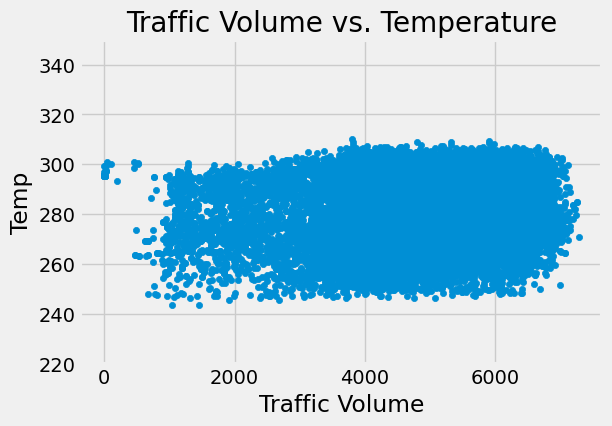

In [20]:
day.plot.scatter(x = "traffic_volume", y = "temp")
plt.xlabel("Traffic Volume")
plt.ylabel("Temp")
plt.title("Traffic Volume vs. Temperature")
plt.ylim([220, 350])
plt.show()

Being the correlation coefficient a weak indicator, this (`temp`) does not seem like an appropriate indicator to use.

On the other hand, `weather_main` and `weather_description` could be potentially good indicators.

## Weather Types
We will take a look into categorical data: `weather_main` and `weather_description`. The goal is to find any realiable indicators for traffic volume.

We need to calculate the average traffic volume related to each data feature: `weather_main` and `weather_description`.

In [21]:
by_weather_main = day.groupby("weather_main").mean()
by_weather_description = day.groupby("weather_description").mean()

Let us create a bar plot for the `traffic_volume` colume of `by_weather_main` and `by_weather_description`.

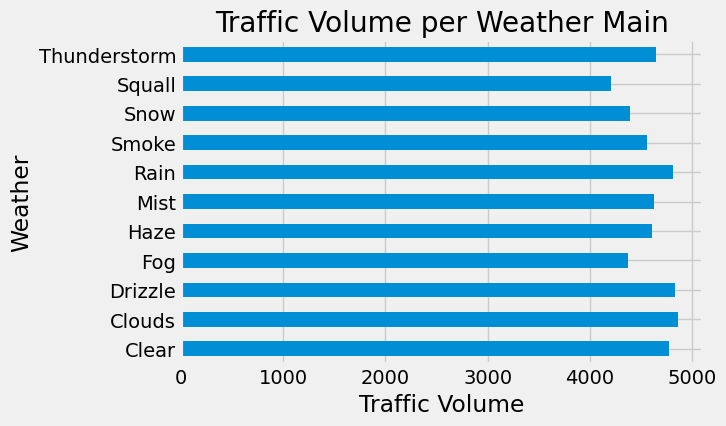

In [22]:
by_weather_main["traffic_volume"].plot.barh()
plt.title("Traffic Volume per Weather Main")
plt.ylabel("Weather")
plt.xlabel("Traffic Volume")
plt.show()

Apparently, there does not seem to be any traffic indicators exceeding 5,000 cars in traffic volume. Maybe if we look for weather into detail through the `weather_description` column we might be able to find a pattern.

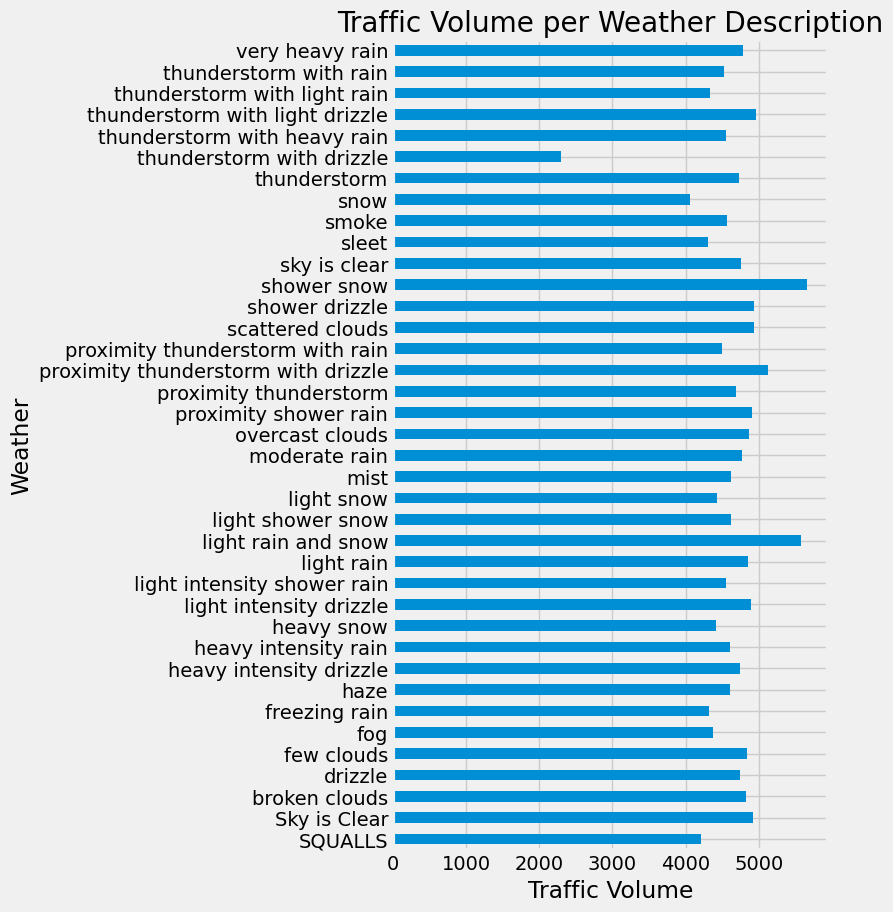

In [24]:
by_weather_description["traffic_volume"].plot.barh(figsize = (5, 10))
plt.title("Traffic Volume per Weather Description")
plt.ylabel("Weather")
plt.xlabel("Traffic Volume")
plt.show()

In [25]:
by_weather_description["traffic_volume"]

weather_description
SQUALLS                                4211.000000
Sky is Clear                           4919.009390
broken clouds                          4824.130326
drizzle                                4737.330935
few clouds                             4839.818023
fog                                    4372.491713
freezing rain                          4314.000000
haze                                   4609.893285
heavy intensity drizzle                4738.586207
heavy intensity rain                   4610.356164
heavy snow                             4411.681250
light intensity drizzle                4890.164049
light intensity shower rain            4558.100000
light rain                             4859.650849
light rain and snow                    5579.750000
light shower snow                      4618.636364
light snow                             4430.858896
mist                                   4623.976475
moderate rain                          4769.643312
overcast cl

In this case, there are three weather types surpassing 5,000 cars: `light rain and snow`, `proximity thunderstorm with drizzle`, and `shower snow`.

## Conclusion
The goal of this project was to find heavy traffic indicators within the available data. 

Leisure time and vacations make traffic volume drop significantly, therefore, business days cause an increment on traffic and is taken as a key heavy traffic indicator. Moreover, warm months cause traffic volume to increase, with the exception of July, a typical month to vacate. Extreme weather like light rain and snow, proximity thunderstorm with drizzle, and shower snow provoke the increment of traffic volume. *Looking at these conclusions, it is reasonable to accept business days, warm months, and extreme weather as key heavy traffic indicators.*